# Names

In [1]:
from prep_n_load import *
from nlp_helpers import tokenize_and_count

Mon Feb  7 21:41:16 2022  UTC
6956 parcels loaded.


## Ratio of parcels without a name

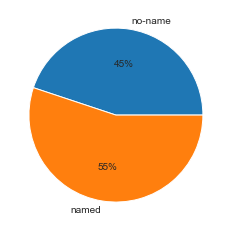

In [2]:
nonameratio = parcels[parcels.name.isna()].id.count() / parcels.shape[0]
_, ax = plt.subplots()
_ = ax.pie([nonameratio, 1 - nonameratio], labels=["no-name", "named"], autopct="%1.0f%%")


## Often used words in parcel names

In [3]:
from collections import Counter
all_names = (p["name"] for p in parcels_json if p["name"] and len(p["name"]) > 1)
c = Counter()
for name in all_names:
    c.update(tokenize_and_count(name))
print(counter_to_string(c, 50))


  448: gallery
  134: mvb
  116: art
   73: hq
   73: tower
   58: club
   54: nft
   48: pranksyland
   47: center
   45: house
   43: museum
   35: temple
   32: beach
   32: mbc
   31: park
   31: bronx
   29: sandbox
   28: studio
   27: dcl
   27: plazas
   27: space
   26: blockchain
   26: satoshi
   26: garden
   25: shop
   24: crypto
   24: metaverse
   23: store
   23: vibes
   22: exhibition
   22: group
   22: tokyo
   22: zonte
   20: meta
   20: north
   20: global
   20: solution
   20: paraverse
   19: teleport
   19: tomato
   18: milan
   18: voxel
   18: place
   18: berlin
   18: collection
   18: plaza
   18: building
   17: cafe
   17: hub
   16: design


* MVB = Metaverse billboards

## Top used words per island

In [4]:
for island_name, row in (
    parcels[~parcels.name.isna()]
    .groupby("island")["name"]
    .apply(" ".join)
    .to_frame()
    .iterrows()
):
    print(island_name)
    print(counter_to_string(tokenize_and_count(row["name"])))
    print()

Berlin
   25: gallery
   18: berlin
   11: m0na
    8: magall
    7: blockchain
    7: global
    7: solution
    7: group
    6: art
    6: ebc

Ceres
    8: ceres
    5: gallery
    4: wei
    4: lounge
    3: mezzanine
    3: tower
    3: synoptic
    2: voxel
    2: market
    2: pride

Electron
    5: electron
    3: paraverse
    2: hall
    1: pixls
    1: pride
    1: gallery
    1: central
    1: mvb
    1: vandao
    1: hq

Euro
    5: euro
    4: tower
    3: portal
    2: metaversatile
    2: studios
    2: zandihar
    2: vtg
    2: hub
    2: gallery
    1: tiger

Far Far Away
   12: school
   12: data
   12: science
    8: far
    5: gallery
    5: away
    2: shore
    2: uncle
    2: bitcoin
    2: ethereal

Fauna
    4: design
    4: gallery
    2: fauna
    2: hippie
    2: pandas
    1: concept
    1: showroom
    1: watering
    1: hole
    1: zodiac

Flora
    4: gallery
    3: center
    3: botanic
    2: space
    2: obeys
    2: mel
    2: garden
    2: xob
   

* The people in Bronx sure like their island name.